In [1]:

%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

from sklearn.decomposition import PCA

from scipy.stats import zscore

from sklearn.svm import SVC


In [2]:
#Load data to Vehicle DataFrame
vehicle_df = pd.read_csv("C:/Users/Vivek Menon/Desktop/Great learning/Un Supervised Learning/Project/vehicle-2.csv")

In [3]:
vehicle_df.head()

compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
2          104         50.0                 106.0         209.0   
3           93         41.0                  82.0         159.0   
4           85         44.0                  70.0         205.0   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
2                  66.0                       10          207.0   
3                  63.0                        9          144.0   
4                 103.0                       52          149.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0                        143   
2           32.0                    23.0                        158   
3           46.0                    19.0                        143   
4           45.0                    19.0                        144   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
4            241.0              325.0                      188.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
4                        127.0             9.0              11.0   

   skewness_about.2  hollows_ratio class  
0             187.0            197   van  
1             189.0            199   van  
2             188.0            196   car  
3             199.0            207   van  
4             180.0            183   bus

In [4]:
#shape of Dataframe , Rows and columns
vehicle_df.shape

(846, 19)

In [5]:
#Checking for Null values in DataFrame
vehicle_df.isnull().sum()

compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64

In [6]:
#Observed the number of Null values in different columns
#Null values need to be either removed or need to be replaced by median values 
#We are replacing the null values with median

In [7]:
X1 = vehicle_df.drop(['class'],axis = 1)

In [8]:
#all missing values are replaced by median of that particular column
vehicle_df2 = X1.apply(lambda x: x.fillna(x.median()),axis=0)

In [9]:
# Copy the 'class' column alone into the  dataframe. This is the dependent variable
vehicle_class = pd.DataFrame(vehicle_df[['class']])

In [10]:
vehicle_df1 = vehicle_df2.join(vehicle_class)   # Recreating vehicle_df1 by combining numerical columns with car names

vehicle_df1.info()
#replaced all null values with median and info is taken to confirm it

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
compactness                    846 non-null int64
circularity                    846 non-null float64
distance_circularity           846 non-null float64
radius_ratio                   846 non-null float64
pr.axis_aspect_ratio           846 non-null float64
max.length_aspect_ratio        846 non-null int64
scatter_ratio                  846 non-null float64
elongatedness                  846 non-null float64
pr.axis_rectangularity         846 non-null float64
max.length_rectangularity      846 non-null int64
scaled_variance                846 non-null float64
scaled_variance.1              846 non-null float64
scaled_radius_of_gyration      846 non-null float64
scaled_radius_of_gyration.1    846 non-null float64
skewness_about                 846 non-null float64
skewness_about.1               846 non-null float64
skewness_about.2               846 non-null float64
hollows_ratio    

In [11]:
#Checking the null values present after replacing with median
vehicle_df2.isnull().sum()

compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
dtype: int64

In [12]:
#Five point analysis of DataFrame
vehicle_df1.describe().T
#this shows quartile values and mean , median values. it also helps to understand skewness

count        mean         std    min     25%  \
compactness                  846.0   93.678487    8.234474   73.0   87.00   
circularity                  846.0   44.823877    6.134272   33.0   40.00   
distance_circularity         846.0   82.100473   15.741569   40.0   70.00   
radius_ratio                 846.0  168.874704   33.401356  104.0  141.00   
pr.axis_aspect_ratio         846.0   61.677305    7.882188   47.0   57.00   
max.length_aspect_ratio      846.0    8.567376    4.601217    2.0    7.00   
scatter_ratio                846.0  168.887707   33.197710  112.0  147.00   
elongatedness                846.0   40.936170    7.811882   26.0   33.00   
pr.axis_rectangularity       846.0   20.580378    2.588558   17.0   19.00   
max.length_rectangularity    846.0  147.998818   14.515652  118.0  137.00   
scaled_variance              846.0  188.596927   31.360427  130.0  167.00   
scaled_variance.1            846.0  439.314421  176.496341  184.0  318.25   
scaled_radius_of_gyration    846.0  174.706856   32.546277  109.0  149.00   
scaled_radius_of_gyration.1  846.0   72.443262    7.468734   59.0   67.00   
skewness_about               846.0    6.361702    4.903244    0.0    2.00   
skewness_about.1             846.0   12.600473    8.930962    0.0    5.00   
skewness_about.2             846.0  188.918440    6.152247  176.0  184.00   
hollows_ratio                846.0  195.632388    7.438797  181.0  190.25   

                               50%     75%     max  
compactness                   93.0  100.00   119.0  
circularity                   44.0   49.00    59.0  
distance_circularity          80.0   98.00   112.0  
radius_ratio                 167.0  195.00   333.0  
pr.axis_aspect_ratio          61.0   65.00   138.0  
max.length_aspect_ratio        8.0   10.00    55.0  
scatter_ratio                157.0  198.00   265.0  
elongatedness                 43.0   46.00    61.0  
pr.axis_rectangularity        20.0   23.00    29.0  
max.length_rectangularity    146.0  159.00   188.0  
scaled_variance              179.0  217.00   320.0  
scaled_variance.1            363.5  586.75  1018.0  
scaled_radius_of_gyration    173.5  198.00   268.0  
scaled_radius_of_gyration.1   71.5   75.00   135.0  
skewness_about                 6.0    9.00    22.0  
skewness_about.1              11.0   19.00    41.0  
skewness_about.2             188.0  193.00   206.0  
hollows_ratio                197.0  201.00   211.0

In [13]:
#classify the class into bus car and van
vehicle_df1.groupby('class').size()

#Observation : More data is for car (since two categories of cars are there) then bus and van

class
bus    218
car    429
van    199
dtype: int64

In [14]:
vehicle_df1.groupby('class').mean()

#Group by mean of different variable 

compactness  circularity  distance_circularity  radius_ratio  \
class                                                                 
bus      91.591743    44.963303             76.811927    165.720183   
car      96.184149    46.030303             88.878788    180.496503   
van      90.562814    42.070352             73.281407    147.276382   

       pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
class                                                                 
bus               63.403670                 7.013761     170.022936   
car               60.993007                 8.825175     180.997669   
van               61.261307                 9.713568     141.537688   

       elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
class                                                                     
bus        40.114679               20.577982                 146.701835   
car        38.104895               21.508159                 149.967366   
van        47.939698               18.582915                 145.175879   

       scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
class                                                                  
bus         192.889908         448.894495                 180.963303   
car         197.806527         499.904429                 179.613054   
van         164.040201         298.201005                 157.276382   

       scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
class                                                                  
bus                      77.071101        4.816514         10.211009   
car                      69.935897        7.121212         15.160839   
van                      72.778894        6.417085          9.698492   

       skewness_about.2  hollows_ratio  
class                                   
bus          187.811927     191.325688  
car          189.470862     197.582751  
van          188.939698     196.145729

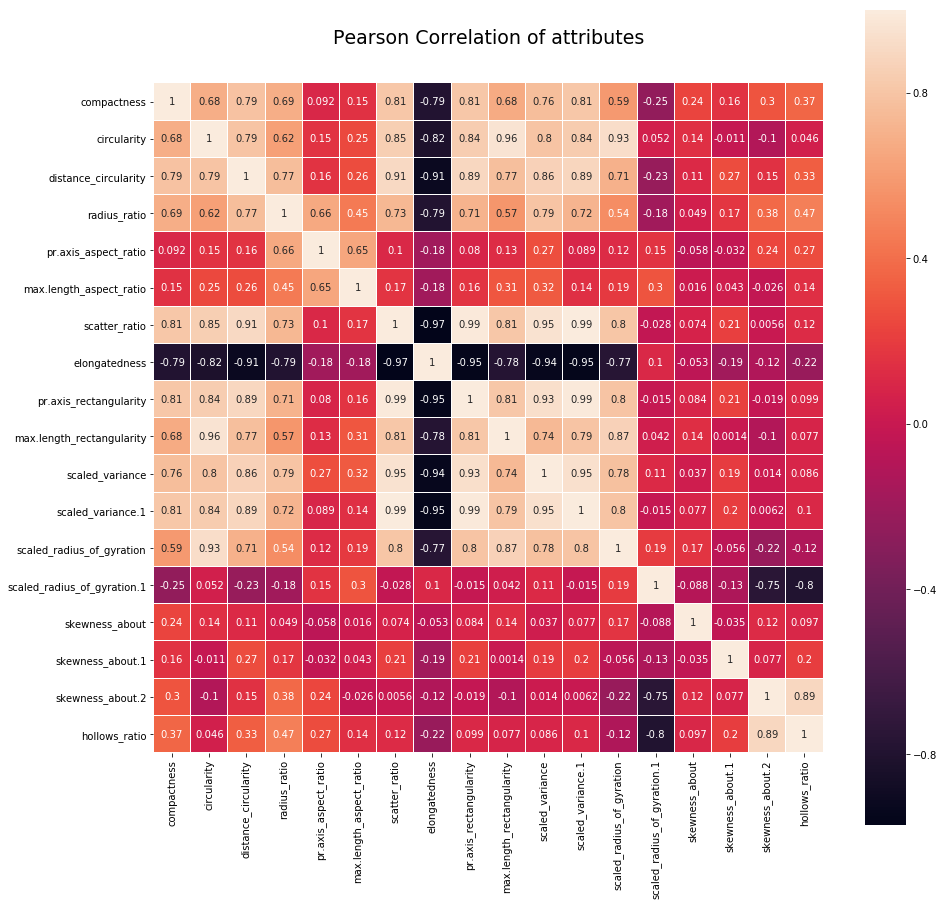

In [15]:
#to calculate correlation between different independent variables
#This shows whether variables are correlated each other .R=0 means no correlation and R =1 and -1 is very correlated
colormap = plt.cm.viridis
plt.figure(figsize=(15,15))
plt.title('Pearson Correlation of attributes', y=1.05, size=19)
sns.heatmap(vehicle_df1.corr(),linewidths=0.1,vmax=1.0, 
            square=True, linecolor='white', annot=True)

In [16]:
#Defining independent and dependent variables into X and Y
X = vehicle_df1.drop(['class'],axis = 1)
y = vehicle_df1[['class']]

In [17]:
#Shape of X
X.shape

(846, 18)

In [18]:
#Shape of y
y.shape

(846, 1)

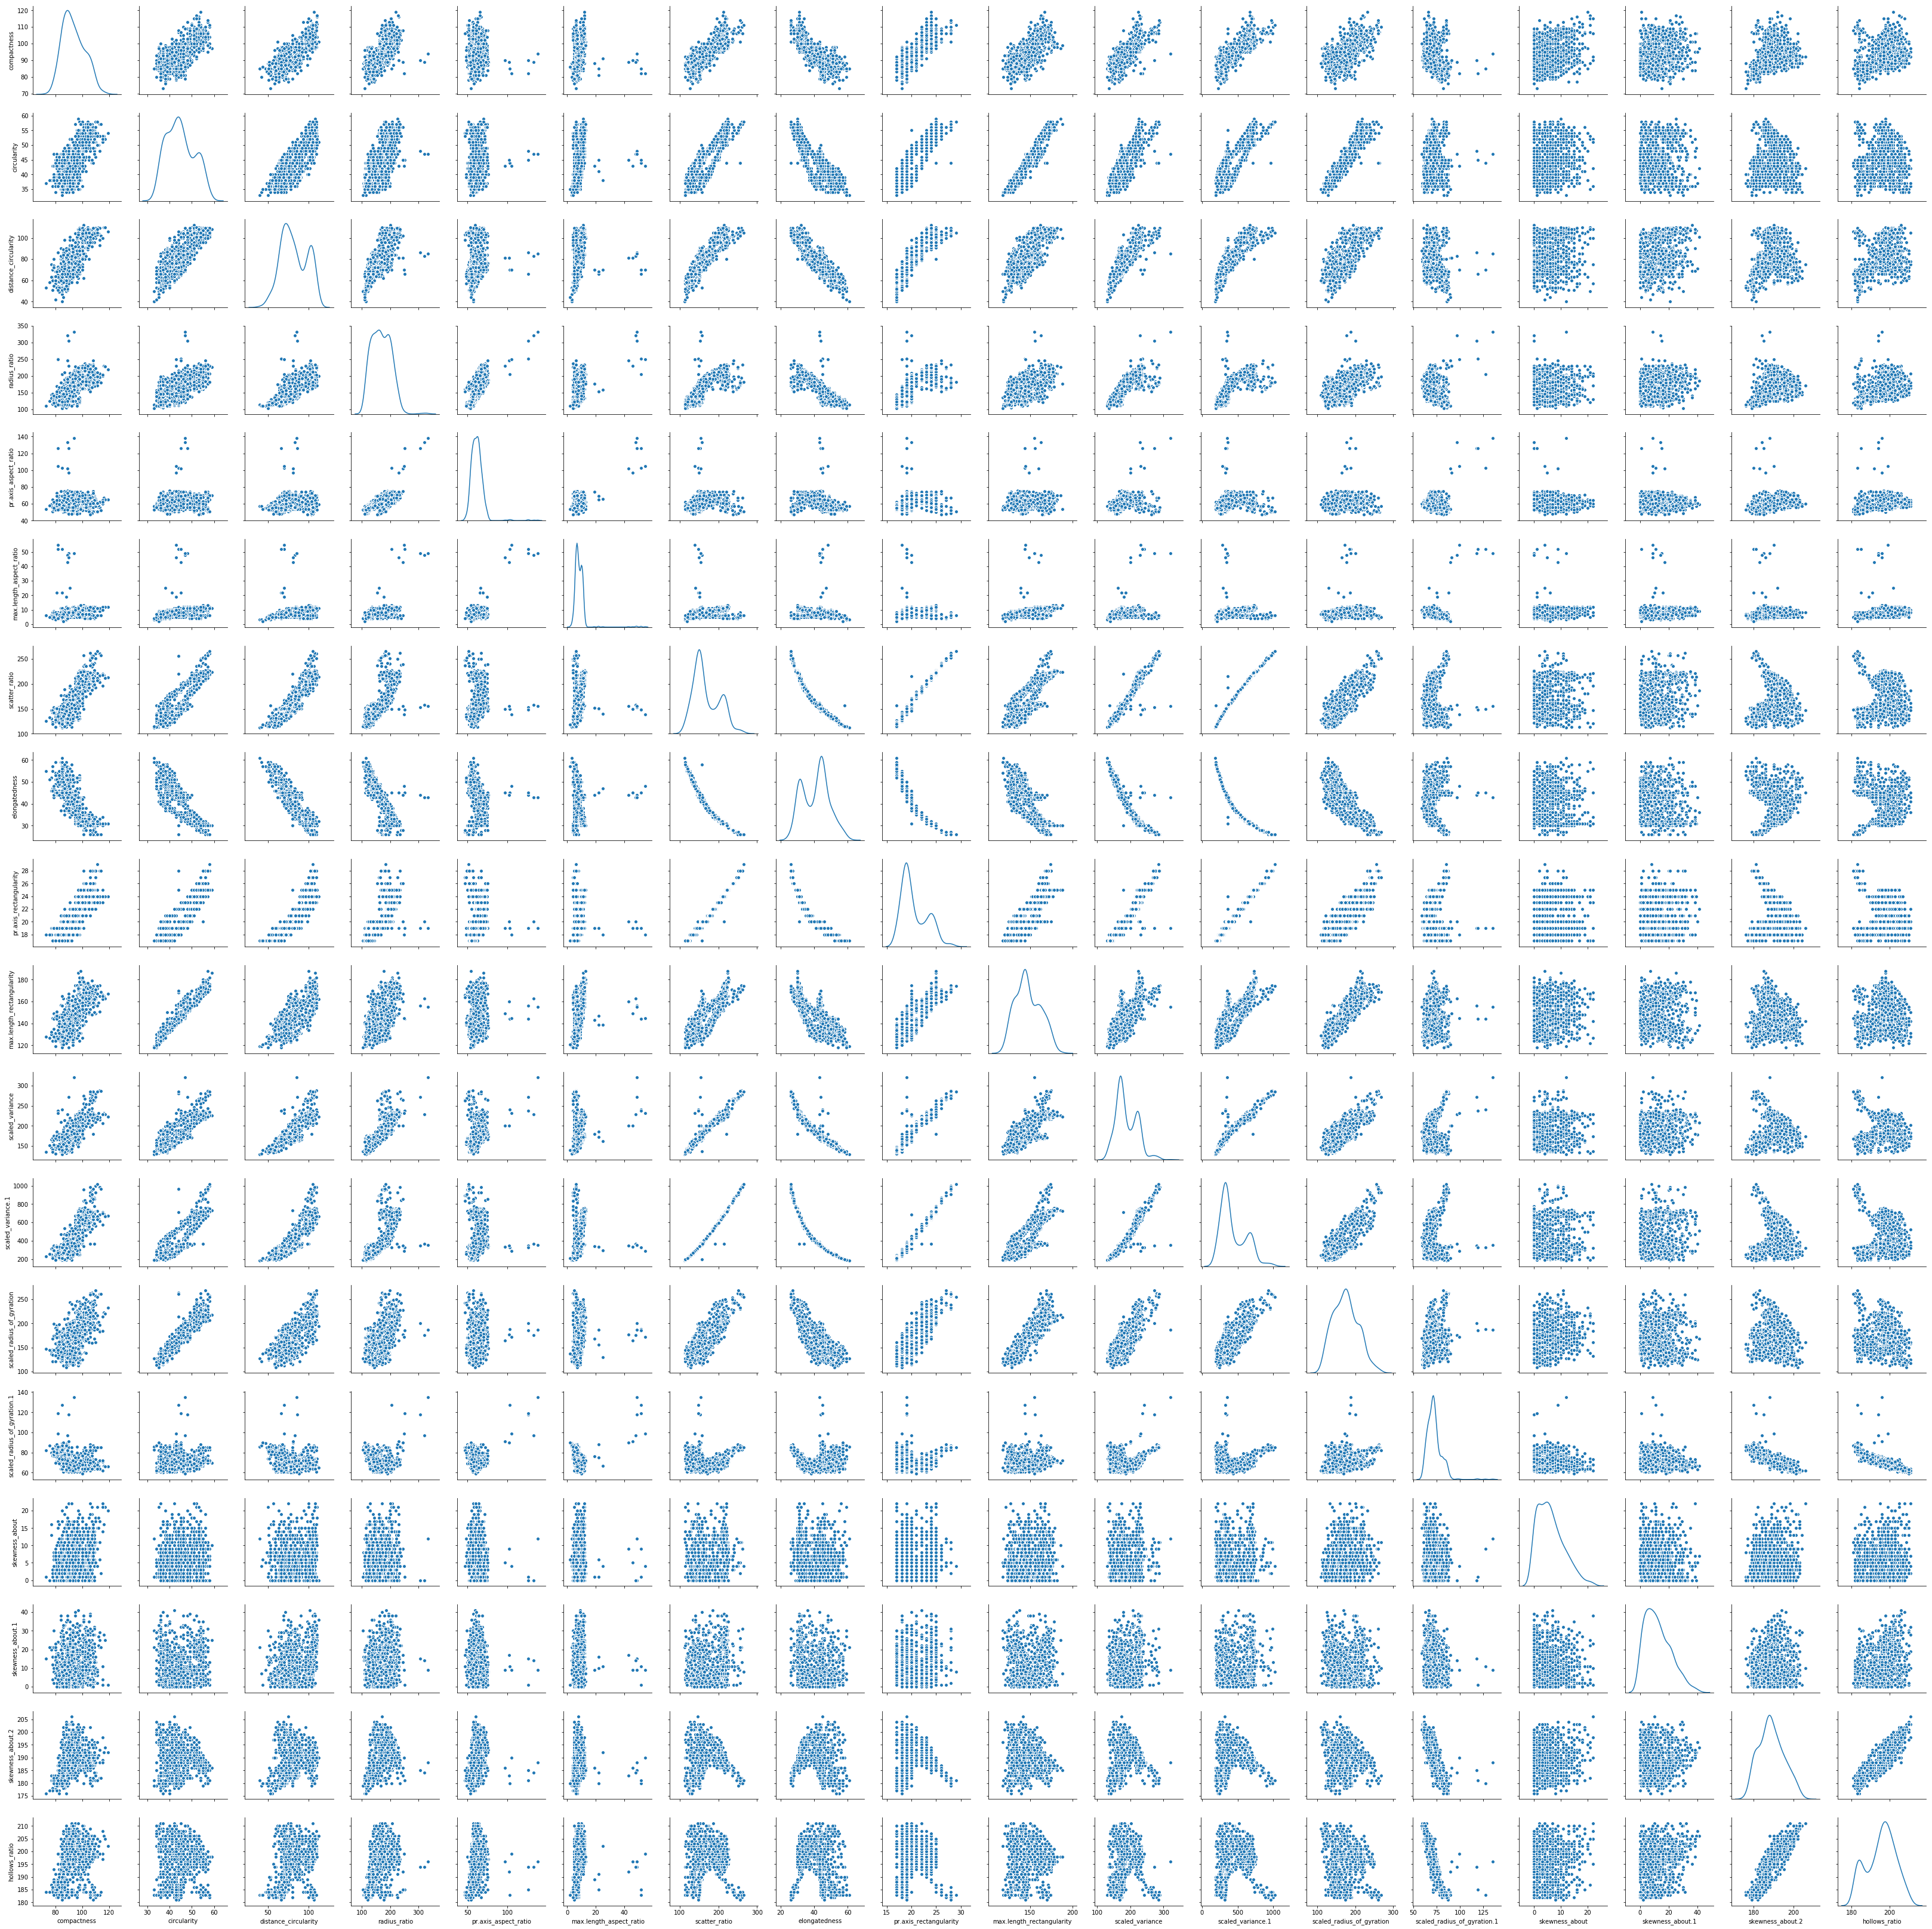

In [22]:
#Pairplot of all variables except Y. KDE in diagonals. Very powerful chart which gives lot of insights including correlation
sns.pairplot(X,diag_kind='kde')

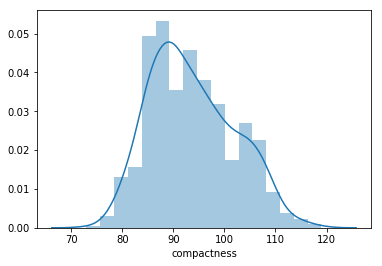

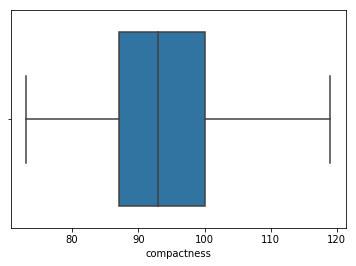

In [28]:
#Distance and box plot of various variables- This gives insights on missing values and outliers

sns.distplot(vehicle_df1['compactness'])
plt.show()
sns.boxplot(vehicle_df1.compactness)
plt.show()
#It has slight right skewness

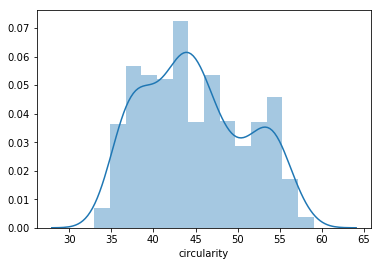

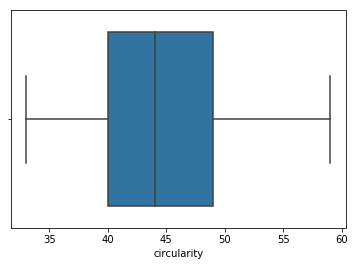

In [29]:
sns.distplot(vehicle_df1['circularity'])
plt.show()
sns.boxplot(vehicle_df1.circularity)
plt.show()

#It shows three gaussians or classes are present in data

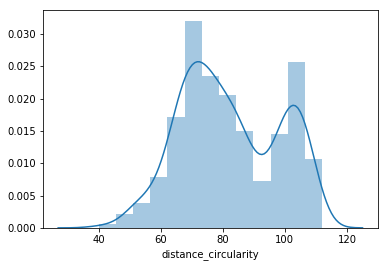

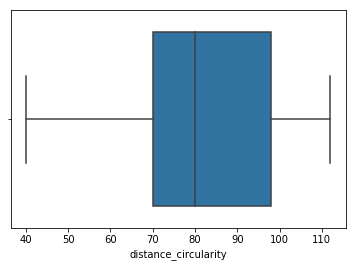

In [30]:
sns.distplot(vehicle_df1['distance_circularity'])
plt.show()
sns.boxplot(vehicle_df1.distance_circularity)
plt.show()

#It has minimum two category or class as per graph and has left outlier 

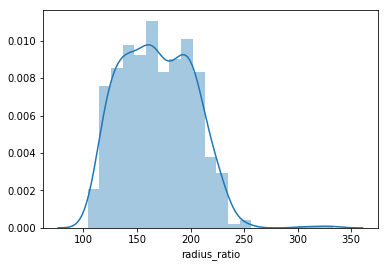

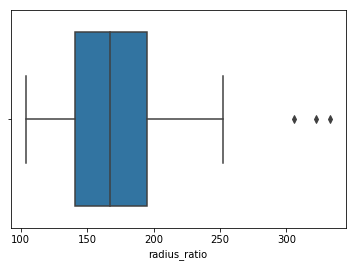

In [31]:
sns.distplot(vehicle_df1['radius_ratio'])
plt.show()
sns.boxplot(vehicle_df1.radius_ratio)
plt.show()

#data has outliers present in the right .shows 3 charts are present

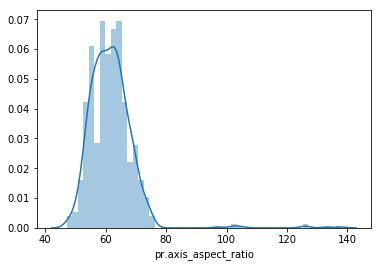

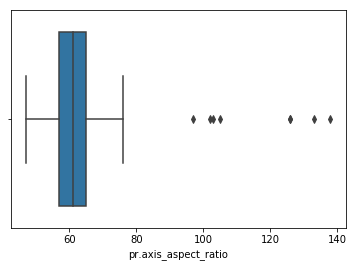

In [32]:
sns.distplot(vehicle_df1['pr.axis_aspect_ratio'])
plt.show()
sns.boxplot(vehicle_df1['pr.axis_aspect_ratio'])
plt.show()

#Lot of outliers present in the right

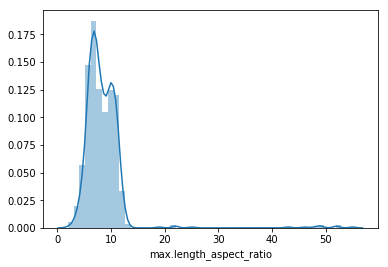

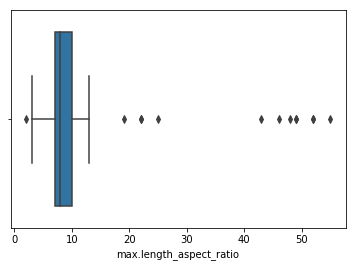

In [33]:
sns.distplot(vehicle_df1['max.length_aspect_ratio'])
plt.show()
sns.boxplot(vehicle_df1['max.length_aspect_ratio'])
plt.show()
#Outliers present in the right

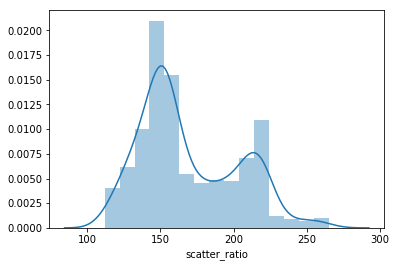

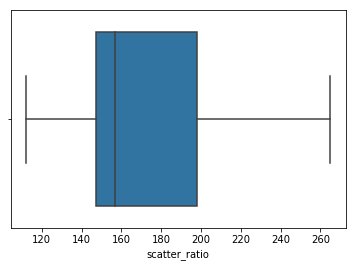

In [34]:
sns.distplot(vehicle_df1['scatter_ratio'])
plt.show()
sns.boxplot(vehicle_df1['scatter_ratio'])
plt.show()
#Verymuch spread data , has right skewness

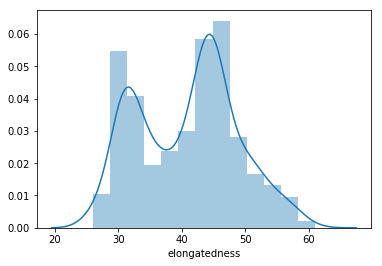

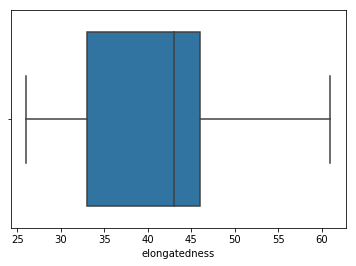

In [35]:
sns.distplot(vehicle_df1['elongatedness'])
plt.show()
sns.boxplot(vehicle_df1['elongatedness'])
plt.show()
#Minimum two sets of data is present

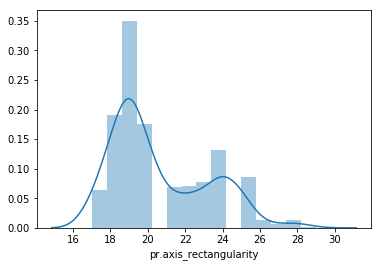

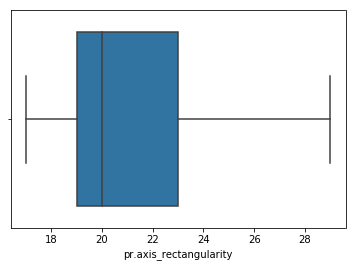

In [36]:
sns.distplot(vehicle_df1['pr.axis_rectangularity'])
plt.show()
sns.boxplot(vehicle_df1['pr.axis_rectangularity'])
plt.show()
#Missing values are there

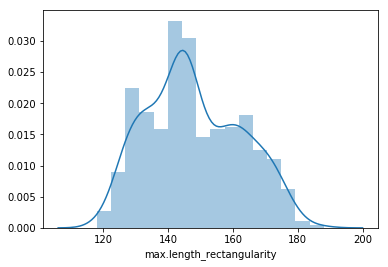

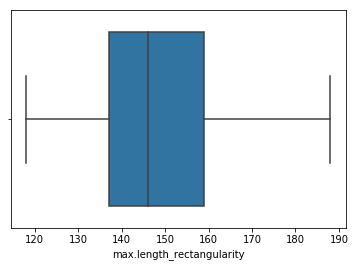

In [37]:
sns.distplot(vehicle_df1['max.length_rectangularity'])
plt.show()
sns.boxplot(vehicle_df1['max.length_rectangularity'])
plt.show()

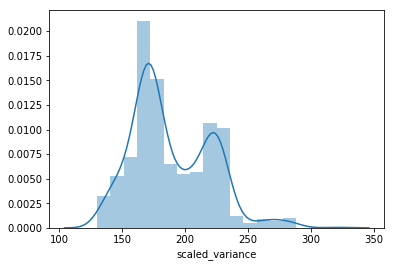

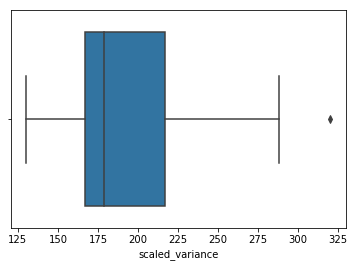

In [38]:
sns.distplot(vehicle_df1['scaled_variance'])
plt.show()
sns.boxplot(vehicle_df1['scaled_variance'])
plt.show()
#Outlier is present in the right . more than two classes are there in data

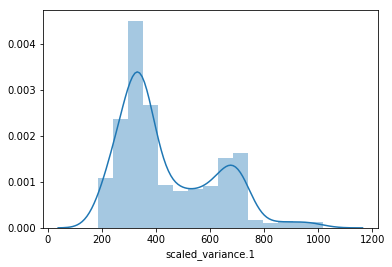

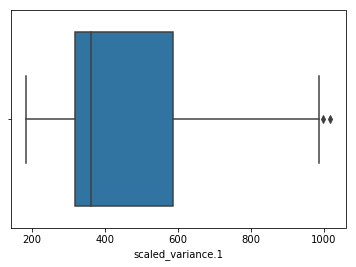

In [39]:
sns.distplot(vehicle_df1['scaled_variance.1'])
plt.show()
sns.boxplot(vehicle_df1['scaled_variance.1'])
plt.show()
#Right skewness and outlier in the right 

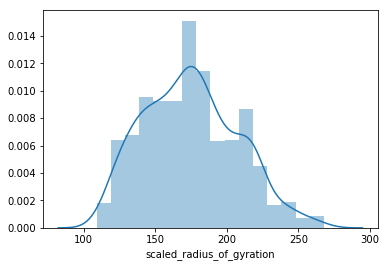

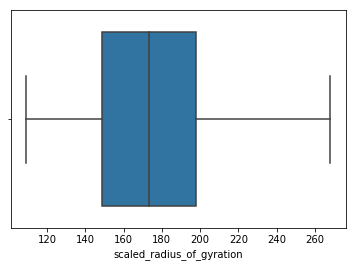

In [40]:
sns.distplot(vehicle_df1['scaled_radius_of_gyration'])
plt.show()
sns.boxplot(vehicle_df1['scaled_radius_of_gyration'])
plt.show()

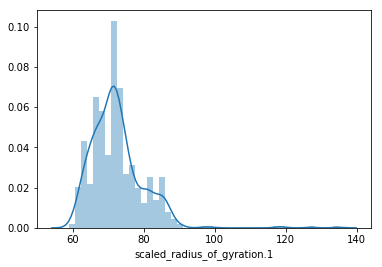

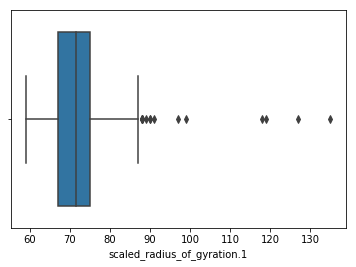

In [41]:
sns.distplot(vehicle_df1['scaled_radius_of_gyration.1'])
plt.show()
sns.boxplot(vehicle_df1['scaled_radius_of_gyration.1'])
plt.show()
#Presence of outliers in the right side

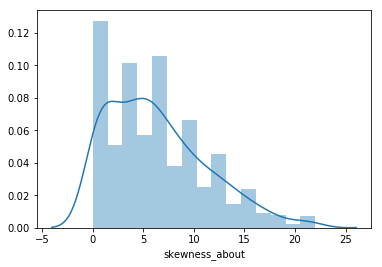

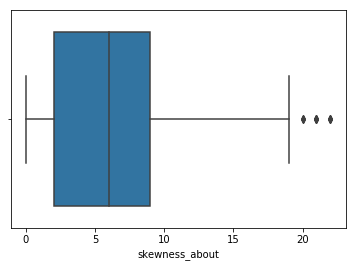

In [42]:
sns.distplot(vehicle_df1['skewness_about'])
plt.show()
sns.boxplot(vehicle_df1['skewness_about'])
plt.show()
#Presence of outliers in the right side

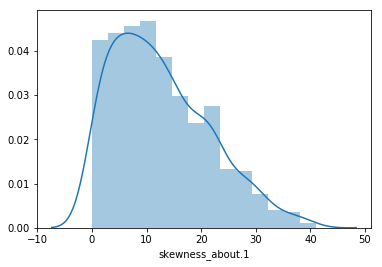

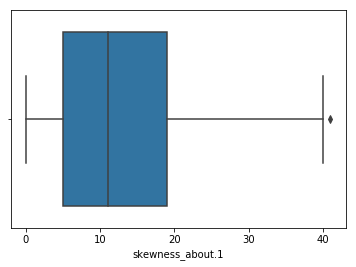

In [43]:
sns.distplot(vehicle_df1['skewness_about.1'])
plt.show()
sns.boxplot(vehicle_df1['skewness_about.1'])
plt.show()
#Right skewness and present of outliers in the right side

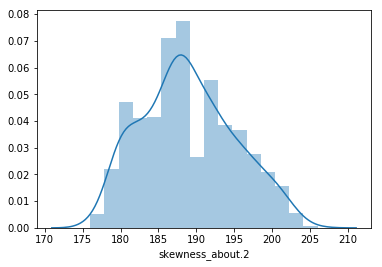

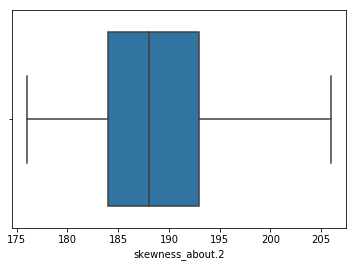

In [44]:
sns.distplot(vehicle_df1['skewness_about.2'])
plt.show()
sns.boxplot(vehicle_df1['skewness_about.2'])
plt.show()
#More than two classes are present

In [45]:
#Define Train test split with 70% training data and 30 % Testing data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size =0.3,random_state=1)

In [46]:
#Scaled the X train and test data.no need to scale y data .
X_train_scaled=X_train.apply(zscore)
X_test_scaled=X_test.apply(zscore)

In [47]:
#USing support vector classifer model. assigning SVC() into model
model=SVC()

In [48]:
#training the model with train data
model.fit(X_train_scaled,y_train)

C:\Users\Vivek Menon\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [49]:
#Testing the model scire with test data
model.score(X_test_scaled,y_test)

0.94881889763779526

In [50]:
#Scaling all independent variables using Zscore
XScaled=X.apply(zscore)
XScaled.head()

compactness  circularity  distance_circularity  radius_ratio  \
0     0.160580     0.518073              0.057177      0.273363   
1    -0.325470    -0.623732              0.120741     -0.835032   
2     1.254193     0.844303              1.519141      1.202018   
3    -0.082445    -0.623732             -0.006386     -0.295813   
4    -1.054545    -0.134387             -0.769150      1.082192   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0              1.310398                 0.311542      -0.207598   
1             -0.593753                 0.094079      -0.599423   
2              0.548738                 0.311542       1.148719   
3              0.167907                 0.094079      -0.750125   
4              5.245643                 9.444962      -0.599423   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0       0.136262               -0.224342                   0.758332   
1       0.520519               -0.610886                  -0.344578   
2      -1.144597                0.935290                   0.689401   
3       0.648605               -0.610886                  -0.344578   
4       0.520519               -0.610886                  -0.275646   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0        -0.401920          -0.341934                   0.285705   
1        -0.593357          -0.619724                  -0.513630   
2         1.097671           1.109379                   1.392477   
3        -0.912419          -0.738777                  -1.466683   
4         1.671982          -0.648070                   0.408680   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                    -0.327326       -0.073812          0.380870   
1                    -0.059384        0.538390          0.156798   
2                     0.074587        1.558727         -0.403383   
3                    -1.265121       -0.073812         -0.291347   
4                     7.309005        0.538390         -0.179311   

   skewness_about.2  hollows_ratio  
0         -0.312012       0.183957  
1          0.013265       0.452977  
2         -0.149374       0.049447  
3          1.639649       1.529056  
4         -1.450481      -1.699181

In [51]:
#Applying covariance for Xscaled data
covMatrix = np.cov(XScaled,rowvar=False)
print(covMatrix)

[[ 1.00118343  0.68569786  0.79086299  0.69055952  0.09164265  0.14842463
   0.81358214 -0.78968322  0.81465658  0.67694334  0.76297234  0.81497566
   0.58593517 -0.24988794  0.23635777  0.15720044  0.29889034  0.36598446]
 [ 0.68569786  1.00118343  0.79325751  0.6216467   0.15396023  0.25176438
   0.8489411  -0.82244387  0.84439802  0.96245572  0.79724837  0.83693508
   0.92691166  0.05200785  0.14436828 -0.01145212 -0.10455005  0.04640562]
 [ 0.79086299  0.79325751  1.00118343  0.76794246  0.15864319  0.26499957
   0.90614687 -0.9123854   0.89408198  0.77544391  0.86253904  0.88706577
   0.70660663 -0.22621115  0.1140589   0.26586088  0.14627113  0.33312625]
 [ 0.69055952  0.6216467   0.76794246  1.00118343  0.66423242  0.45058426
   0.73529816 -0.79041561  0.70922371  0.56962256  0.79435372  0.71928618
   0.53700678 -0.18061084  0.04877032  0.17394649  0.38266622  0.47186659]
 [ 0.09164265  0.15396023  0.15864319  0.66423242  1.00118343  0.64949139
   0.10385472 -0.18325156  0.07969

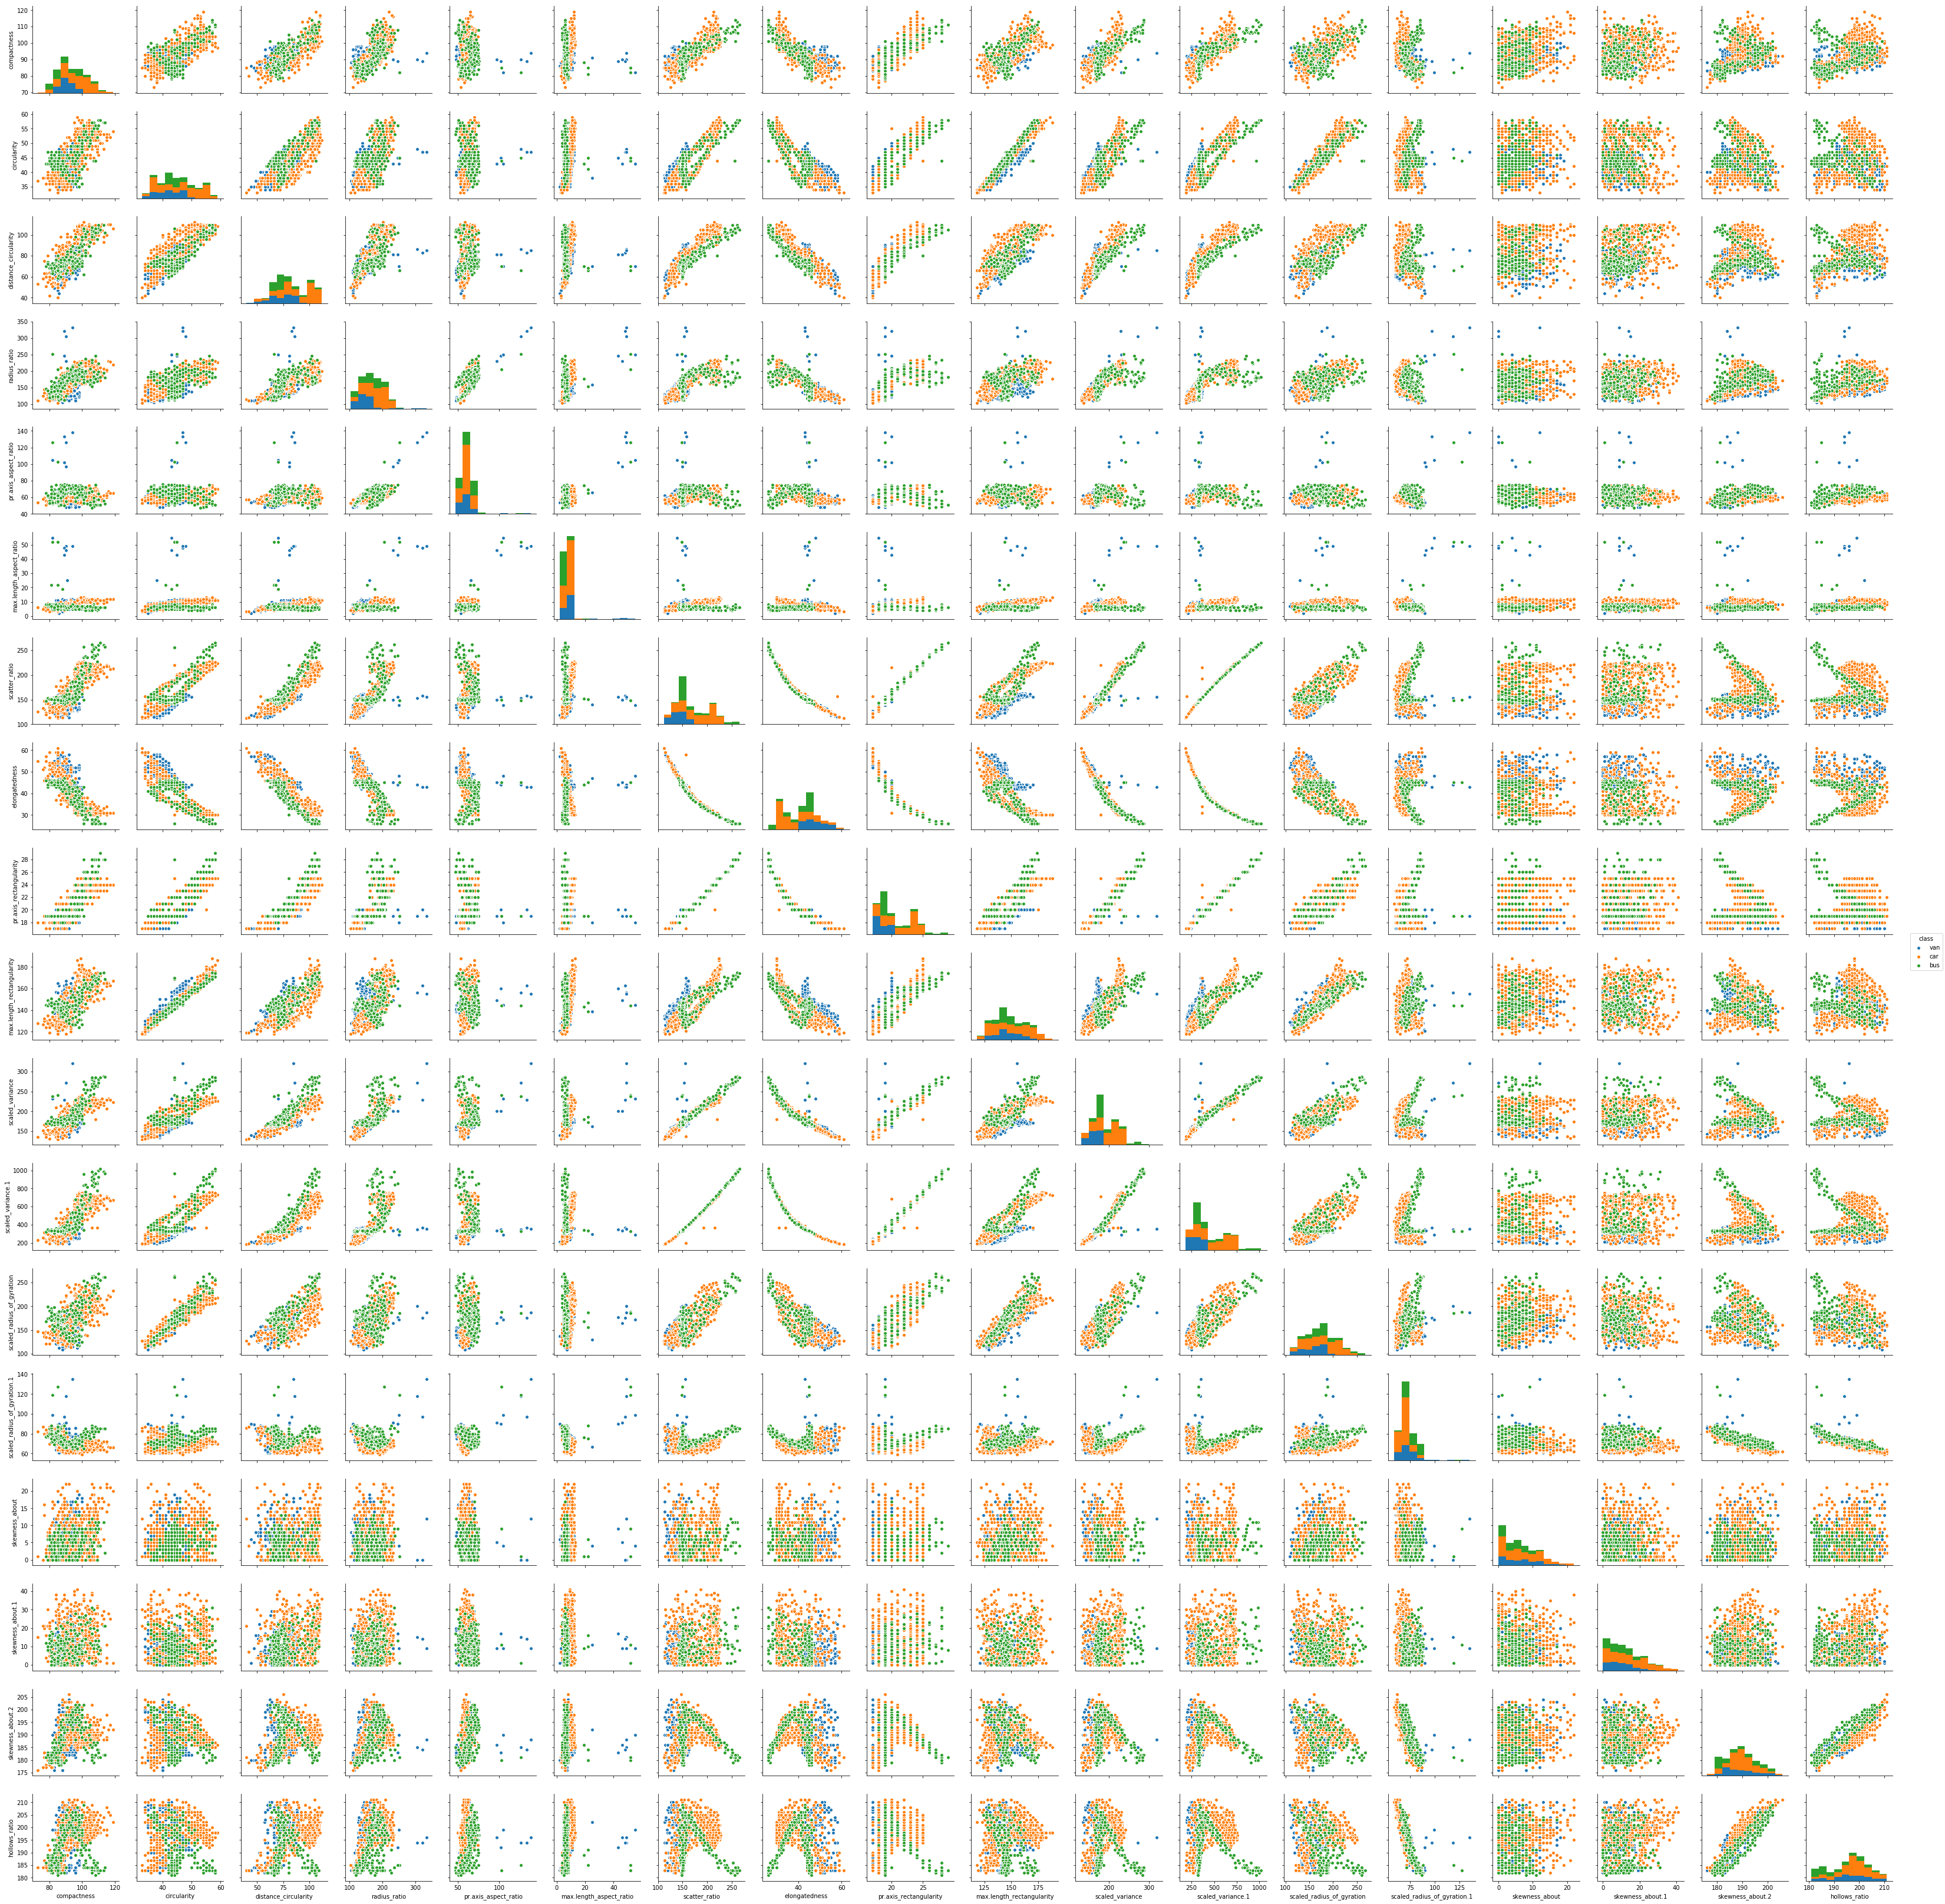

In [52]:
sns.pairplot(vehicle_df1,hue="class")


In [53]:
#Taking PCA for maximum components , that is 18 and then training PCA
pca = PCA(n_components=18)
pca.fit(XScaled)

PCA(copy=True, iterated_power='auto', n_components=18, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [54]:
#variance of each component in pca
print(pca.explained_variance_)

[  9.40460261e+00   3.01492206e+00   1.90352502e+00   1.17993747e+00
   9.17260633e-01   5.39992629e-01   3.58870118e-01   2.21932456e-01
   1.60608597e-01   9.18572234e-02   6.64994118e-02   4.66005994e-02
   3.57947189e-02   2.74120657e-02   2.05792871e-02   1.79166314e-02
   1.00257898e-02   2.96445743e-03]


In [55]:
#Print the PCA components
print(pca.components_)

[[  2.75283688e-01   2.93258469e-01   3.04609128e-01   2.67606877e-01
    8.05039890e-02   9.72756855e-02   3.17092750e-01  -3.14133155e-01
    3.13959064e-01   2.82830900e-01   3.09280359e-01   3.13788457e-01
    2.72047492e-01  -2.08137692e-02   4.14555082e-02   5.82250207e-02
    3.02795063e-02   7.41453913e-02]
 [ -1.26953763e-01   1.25576727e-01  -7.29516436e-02  -1.89634378e-01
   -1.22174860e-01   1.07482875e-02   4.81181371e-02   1.27498515e-02
    5.99352482e-02   1.16220532e-01   6.22806229e-02   5.37843596e-02
    2.09233172e-01   4.88525148e-01  -5.50899716e-02  -1.24085090e-01
   -5.40914775e-01  -5.40354258e-01]
 [ -1.19922479e-01  -2.48205467e-02  -5.60143254e-02   2.75074211e-01
    6.42012966e-01   5.91801304e-01  -9.76283108e-02   5.76484384e-02
   -1.09512416e-01  -1.70641987e-02   5.63239801e-02  -1.08840729e-01
   -3.14636493e-02   2.86277015e-01  -1.15679354e-01  -7.52828901e-02
    8.73592034e-03   3.95242743e-02]
 [  7.83843562e-02   1.87337408e-01  -7.12008427e

In [56]:
print(pca.explained_variance_ratio_)

[  5.21860337e-01   1.67297684e-01   1.05626388e-01   6.54745969e-02
   5.08986889e-02   2.99641300e-02   1.99136623e-02   1.23150069e-02
   8.91215289e-03   5.09714695e-03   3.69004485e-03   2.58586200e-03
   1.98624491e-03   1.52109243e-03   1.14194232e-03   9.94191854e-04
   5.56329946e-04   1.64497408e-04]


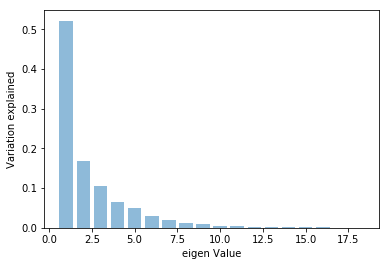

In [57]:
plt.bar(list(range(1,19)),pca.explained_variance_ratio_,alpha=0.5, align='center')
plt.ylabel('Variation explained')
plt.xlabel('eigen Value')
plt.show()

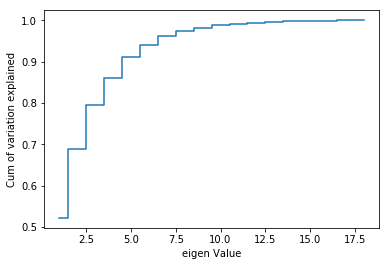

In [58]:
#Elbow method to understand the ideal PCA value
plt.step(list(range(1,19)),np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Cum of variation explained')
plt.xlabel('eigen Value')
plt.show()

In [59]:
#calculating the cumulative values and with more than 95%variabce means PCA can be taken 6
np.cumsum(pca.explained_variance_ratio_)

array([ 0.52186034,  0.68915802,  0.79478441,  0.86025901,  0.9111577 ,
        0.94112183,  0.96103549,  0.97335049,  0.98226265,  0.98735979,
        0.99104984,  0.9936357 ,  0.99562195,  0.99714304,  0.99828498,
        0.99927917,  0.9998355 ,  1.        ])

In [60]:
#Training with PCA 6 value and transforming it 
pca6 = PCA(n_components=6)
pca6.fit(XScaled)
print(pca6.components_)
print(pca6.explained_variance_ratio_)
Xpca6 = pca6.transform(XScaled)

[[  2.75283688e-01   2.93258469e-01   3.04609128e-01   2.67606877e-01
    8.05039890e-02   9.72756855e-02   3.17092750e-01  -3.14133155e-01
    3.13959064e-01   2.82830900e-01   3.09280359e-01   3.13788457e-01
    2.72047492e-01  -2.08137692e-02   4.14555082e-02   5.82250207e-02
    3.02795063e-02   7.41453913e-02]
 [ -1.26953763e-01   1.25576727e-01  -7.29516436e-02  -1.89634378e-01
   -1.22174860e-01   1.07482875e-02   4.81181371e-02   1.27498515e-02
    5.99352482e-02   1.16220532e-01   6.22806229e-02   5.37843596e-02
    2.09233172e-01   4.88525148e-01  -5.50899716e-02  -1.24085090e-01
   -5.40914775e-01  -5.40354258e-01]
 [ -1.19922479e-01  -2.48205467e-02  -5.60143254e-02   2.75074211e-01
    6.42012966e-01   5.91801304e-01  -9.76283108e-02   5.76484384e-02
   -1.09512416e-01  -1.70641987e-02   5.63239801e-02  -1.08840729e-01
   -3.14636493e-02   2.86277015e-01  -1.15679354e-01  -7.52828901e-02
    8.73592034e-03   3.95242743e-02]
 [  7.83843562e-02   1.87337408e-01  -7.12008427e

In [61]:
#X Transformed with PCA 6
Xpca6

array([[  3.34162030e-01,  -2.19026358e-01,   1.00158417e+00,
          1.76612370e-01,   7.93007079e-02,  -7.57446693e-01],
       [ -1.59171085e+00,  -4.20602982e-01,  -3.69033854e-01,
          2.33234117e-01,   6.93948582e-01,  -5.17161832e-01],
       [  3.76932418e+00,   1.95282752e-01,   8.78587404e-02,
          1.20221219e+00,   7.31732265e-01,   7.05041037e-01],
       ..., 
       [  4.80917387e+00,  -1.24931049e-03,   5.32333105e-01,
          2.95652324e-01,  -1.34423635e+00,  -2.17069763e-01],
       [ -3.29409242e+00,  -1.00827615e+00,  -3.57003198e-01,
         -1.93367514e+00,   4.27680052e-02,  -4.02491279e-01],
       [ -4.76505347e+00,   3.34899728e-01,  -5.68136078e-01,
         -1.22480708e+00,  -5.40510367e-02,  -3.35637136e-01]])

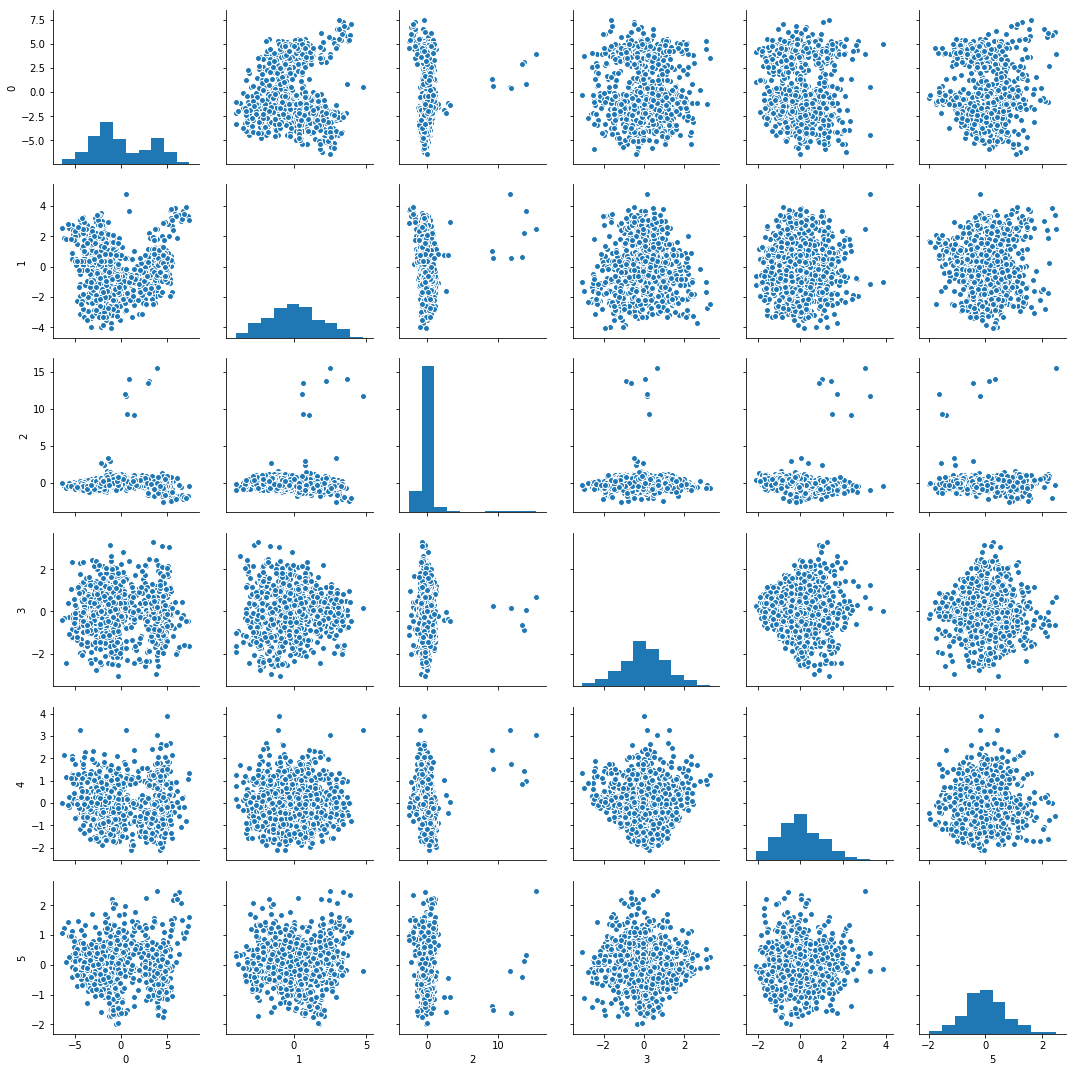

In [62]:
#Pairplot with Xpca6. new variables are pairplot and can see no variables are correlated
sns.pairplot(pd.DataFrame(Xpca6))

In [63]:
#Support vector classifier
clf=SVC()

In [64]:
#Training the Support vector classifier with Xscaled 
clf.fit(XScaled,y)

C:\Users\Vivek Menon\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [65]:
#Testing the Support vector Classifier score. Overfitting model
clf.score(XScaled,y)

0.98108747044917255

In [66]:
#Define model with clf1 with support vector classifier
clf1 = SVC()

In [67]:
#Train model with PCA 6 transformed
clf1.fit(Xpca6,y)

C:\Users\Vivek Menon\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [68]:
clf1.score(Xpca6,y)

0.93380614657210403

In [69]:
pca9 = PCA(n_components=9)
pca9.fit(XScaled)
print(pca9.components_)
print(pca9.explained_variance_ratio_)
Xpca9 = pca9.transform(XScaled)

[[  2.75283688e-01   2.93258469e-01   3.04609128e-01   2.67606877e-01
    8.05039890e-02   9.72756855e-02   3.17092750e-01  -3.14133155e-01
    3.13959064e-01   2.82830900e-01   3.09280359e-01   3.13788457e-01
    2.72047492e-01  -2.08137692e-02   4.14555082e-02   5.82250207e-02
    3.02795063e-02   7.41453913e-02]
 [ -1.26953763e-01   1.25576727e-01  -7.29516436e-02  -1.89634378e-01
   -1.22174860e-01   1.07482875e-02   4.81181371e-02   1.27498515e-02
    5.99352482e-02   1.16220532e-01   6.22806229e-02   5.37843596e-02
    2.09233172e-01   4.88525148e-01  -5.50899716e-02  -1.24085090e-01
   -5.40914775e-01  -5.40354258e-01]
 [ -1.19922479e-01  -2.48205467e-02  -5.60143254e-02   2.75074211e-01
    6.42012966e-01   5.91801304e-01  -9.76283108e-02   5.76484384e-02
   -1.09512416e-01  -1.70641987e-02   5.63239801e-02  -1.08840729e-01
   -3.14636493e-02   2.86277015e-01  -1.15679354e-01  -7.52828901e-02
    8.73592034e-03   3.95242743e-02]
 [  7.83843562e-02   1.87337408e-01  -7.12008427e

In [70]:
clf2=SVC()

In [71]:
clf2.fit(Xpca9,y)

C:\Users\Vivek Menon\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [72]:
clf2.score(Xpca9,y)

0.97754137115839246